# Linear Regression

## Table of Content

* [Multiple Linear Regression](#Multiple-Linear-Regression)

* [Ridge Regression](#Ridge-Regression)

* [The Lasso Regression](#The-Lasso-Regression)

* [Climate Change](#Climate-Change)

## Multiple Linear Regression

Linear regression is a very simple approach for supervised learning. $Y$ is a response variable, $X_{1}, X_{2}, ..., X_{p}$ are $p$ distinct predictors. Multiple linear regression model takes the form 

\begin{equation} 
  Y = \beta_{0}+\beta_{1}X_{1}+...+\beta_{p}X_{p}+\epsilon,
  \label{eq1}
\end{equation}


${\beta_{0}, \beta_{1}, ..., \beta_{p}}$ are unknown and must be estimated. The parameters are estimated using least square approach. We choose ${\beta_{0}, \beta_{1}, ..., \beta_{p}}$ to minimize the _sum of square residuals_ (RSS)

\begin{equation}
  RSS = \sum_{i=1}^{n}{(y_{i}-\hat y_{i})^2}=\sum_{i=1}^{n}{(y_{i}-\hat \beta_{0}-\hat \beta_{1}x_{i1}-\hat \beta_{2}x_{i2}-...-\hat \beta_{p}x_{ip})^2}
\end{equation}

The values ${\hat \beta_{0}, \hat\beta_{1}, ..., \hat\beta_{p}}$ that minimize RSS are the multiple least squares regression coefficient estimates.

_Mean square error_ (MSE)
\begin{equation}
  MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_{i}-\hat y_{i})^2}
\end{equation}

The MSE will be small if the predicted response are very close to the true response, and will be large if some of the observations the predicted and true responses differ substantially. The quality of a linear regression fit is typically assessed using two related quantities: the _residual standart error_ (RSE) and $R^2$ statistics. The RSE is an estimate of the standart deviation of $\epsilon$.

\begin{equation}
  RSE = \sqrt{\frac{1}{n-p-1}RSS}
\end{equation}

\begin{equation}
  R^2 = 1-\frac{RSS}{TSS}
\end{equation}

\begin{equation}
  TSS = \sum_{i=1}^{n}{(y_{i}-\overline y)^2}
\end{equation}

The TSS is _total sum of squares_, $\overline y=\frac{1}{n}\sum_{i=1}^{n}{y_{i}}$. The TTS measures the total variance in the response $Y$. $R^2$ statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression.


### Note

$n\gg p$ Least square estimates good performs. 

$p>n$ no unique least squares coefficient estimate. 

$n\ge p$ poor prediction with min RSS.

_Shrinkage_. Thie aproach involves fitting a model involving $p$ predictors. However, the estimated coefficients are shrunken towards zero relative to the least squares estimates. This shrinkage (also known as _regularization_) has the effect of reducing variance. Depending on what type of shrinkage is performed, some of the coefficients may be estimated to be exactly zero. Hence, shrinkage methods can also perform variable selection. The two best-known techniques for shrinking the regression coefficients towards zero are _ridge regression_ and the _lasso_.

## Ridge Rergression

The ridge regression coefficient estimates $\hat \beta^{R}$ are the values that minimize

\begin{equation}
RSS+\lambda\sum_{j=1}^{p}{\beta_{j}^{2}}
    \label{eq7}
\end{equation}

where $\lambda\geq0$ is a tuning parameter. Second term $\lambda\sum_{j=1}^{p}{\beta_{j}^{2}}$
is called a shrinkage penalty. Shrinkage penalty is small, when ${\beta_{0}, \beta_{1}, ..., \beta_{p}}$ are close to $0$. It has effect of shrinking the estimates $\beta_{j}$ towards $0$. At $\lambda=0$ penalty has no effect. $\lambda\to\infty$ hence $\hat\beta^{R}\to0$. Selecting a good value for $\lambda$ is critical. See [[1]](#Reference) for more details.

## The Lasso Regression

\begin{equation}
RSS+\lambda\sum_{j=1}^{p}{|\beta_{j}|}
\end{equation}

The lasso penalty is $\lambda\sum_{j=1}^{p}{|\beta_{j}|}$. At $\lambda=0$ penalty has no effect. $\lambda\to\infty$ hence $\hat\beta^{L}\to 0$. The lasso performs variable selection. We say that the lasso yields sparse models - that is, models that involves only a subset of the variables. Selection of $\lambda$ is performed by cross-validation. See [[1]](#Reference) for more details.

## Climate Cahnge

#### Data Description

There have been many studies documenting that the average global temperature has been increasing over the last century. The consequences of a continued rise in global temperature will be dire. Rising sea levels and an increased frequency of extreme weather events will affect billions of people.

In this problem, we will attempt to study the relationship between average global temperature and several other factors.

The file `climate_change.csv` contains climate data from May 1983 to December 2008. The available variables include:

**Year**: the observation year.

**Month**: the observation month.

**Temp**: the difference in degrees Celsius between the average global temperature in that period and a reference value. This data comes from the Climatic Research Unit at the University of East Anglia.

**CO2, N2O, CH4, CFC.11, CFC.12**: atmospheric concentrations of carbon dioxide (CO2), nitrous oxide (N2O), methane  (CH4), trichlorofluoromethane (CCl3F; commonly referred to as CFC-11) and dichlorodifluoromethane (CCl2F2; commonly referred to as CFC-12), respectively. This data comes from the ESRL/NOAA Global Monitoring Division.

> CO2, N2O and CH4 are expressed in ppmv (parts per million by volume  -- i.e., 397 ppmv of CO2 means that CO2 constitutes 397 millionths of the total volume of the atmosphere)

> CFC.11 and CFC.12 are expressed in ppbv (parts per billion by volume). 

**Aerosols**: the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun's energy is reflected back into space. This data is from the Godard Institute for Space Studies at NASA.

**TSI**: the total solar irradiance (TSI) in W/m2 (the rate at which the sun's energy is deposited per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given off by the sun varies substantially with time. This data is from the SOLARIS-HEPPA project website.

**MEI**: multivariate El Nino Southern Oscillation index (MEI), a measure of the strength of the El Nino/La Nina-Southern Oscillation (a weather effect in the Pacific Ocean that affects global temperatures). This data comes from the ESRL/NOAA Physical Sciences Division.

#### Data Understanding

In [1]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import seaborn as sns

In [21]:
from sklearn.linear_model import LinearRegression 

In [2]:
import numpy as np

Loading data

In [9]:
climate = pd.read_csv("../Data/climate_change.csv")

In [8]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
Year        308 non-null int64
Month       308 non-null int64
MEI         308 non-null float64
CO2         308 non-null float64
CH4         308 non-null float64
N2O         308 non-null float64
CFC-11      308 non-null float64
CFC-12      308 non-null float64
TSI         308 non-null float64
Aerosols    308 non-null float64
Temp        308 non-null float64
dtypes: float64(9), int64(2)
memory usage: 26.5 KB


In [10]:
climate.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


Compute the correlations between all the variables in the training set. Which of the following independent variables is N2O highly correlated with (absolute correlation greater than 0.7)? 

In [9]:
correlation = climate.corr()
correlation   

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


In [10]:
import matplotlib as mpl
# print(plt.style.available)

In [11]:
mpl.style.use(['seaborn-paper'])

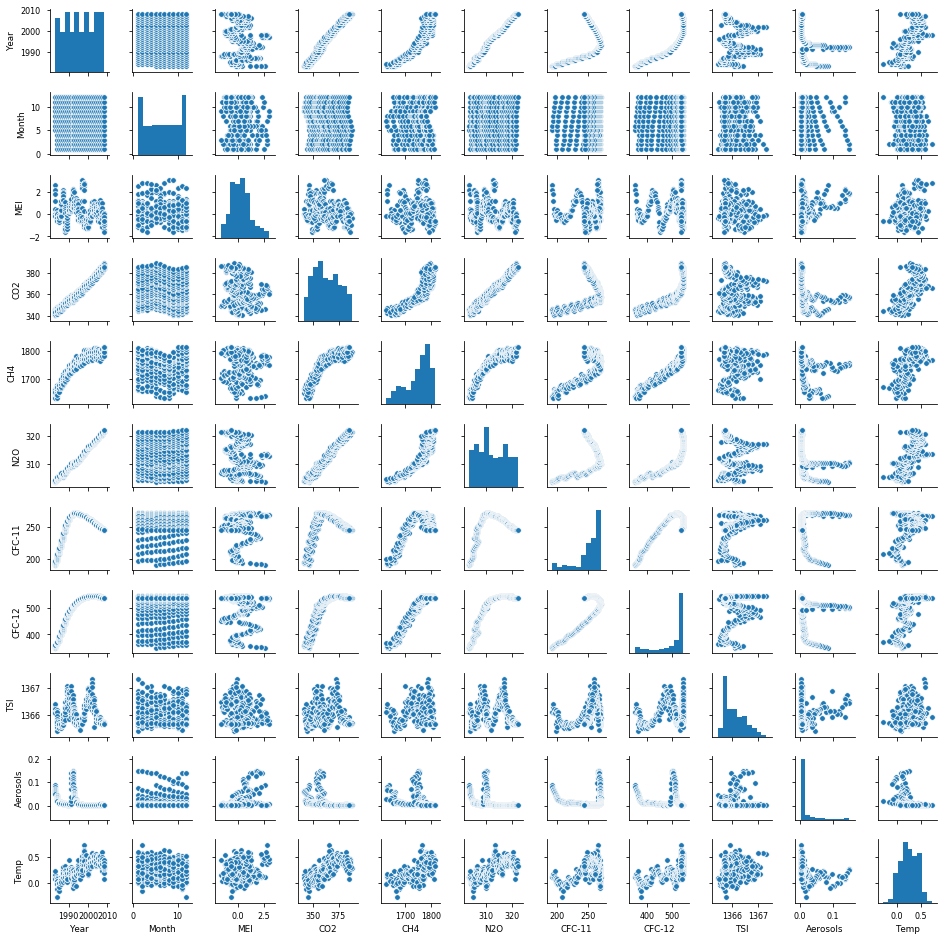

In [13]:
sns.pairplot(climate, height = 1.2);

_Collinearity_ refers to the situation in which two or more predictor variables are very highly correlated with each other. The presence of collinearity can pose problems in regression context, since it can be difficult to separate out the individual effects of collinear variables in a response. A simple way to detect collinearity is to look at the correlation matrix of the predictors. An element of this matrix that is large absolute value indicates a pair of highly correlated variables, and therefore a collinearity problem in the data. Unfortunately, not all collinearity problems can be detected by inspection of the correlation matrix: it is possible for collinearity to exist between three or more variables even if no pair of variables has a paticulary high correlation. We call this situation _multicollinearity_.

When faced with the prolem of collinearity, there are two simple solutions. The first is to drop one of the problematic variables from the regression. The second solution is to cimbine the collinear variables together into a single predictor.

#### Multiple Linear Regression Model

##### scikit-learn

Split the data into a _training_ set, consisting of all the observations up to and including 2006, and a _testing_ set consisting of the remaining years.

In [17]:
condition = climate["Year"] <= 2006
Train = climate[condition]
Test = climate[~condition]

print("Train data set size {}".format(Train.shape))
print("Test data set size {}".format(Test.shape))

Train data set size (284, 11)
Test data set size (24, 11)


Next, build a linear regression model to predict the dependent variable `Temp`, using `MEI, CO2, CH4, N2O, CFC-11, CFC-12, TSI`, and `Aerosols` as independent variables (`Year` and `Month` should NOT be used in the model). Use the training set to build the model.

In [22]:
# skikitlearn model

predictors = ["MEI", "CO2", "CH4", "N2O", "CFC-11", "CFC-12", "TSI", "Aerosols"]

Xtrain = Train[predictors]
ytrain = Train["Temp"]

Xtest = Test[predictors]
ytest = Test["Temp"]


In [23]:
lm = LinearRegression().fit(Xtrain, ytrain)
#print("R^2 = {}".format(lm.score(Xtrain,ytrain)) )


In [24]:
print("Intersept: {}".format(lm.intercept_))

# convert corfficients to series
coef = pd.Series(lm.coef_ , index = predictors)
coef.index.name = 'Regression Coefficients:'
coef

Intersept: -124.59426040111464


Regression Coefficients:
MEI         0.064205
CO2         0.006457
CH4         0.000124
N2O        -0.016528
CFC-11     -0.006630
CFC-12      0.003808
TSI         0.093141
Aerosols   -1.537613
dtype: float64

Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that are able to trap heat from the sun and contribute to the heating of the Earth. However, the regression coefficients of both the N2O and CFC-11 variables are negative, indicating that increasing atmospheric concentrations of either of these two compounds is associated with lower global temperatures.

Which of the following is the simplest correct explanation for this contradiction?

All of the gas concentration variables reflect human development - `N2O` and `CFC-11` are correlated with other variables in the data set.

##### Model Evaluation

In [25]:
def model_evaluation(model, data, response):
    
    predicted = model.predict(data)

    RSS = sum((response-predicted)**2)
    TSS = sum((ytrain.mean()-response)**2)

    R2 = 1.0 - RSS/TSS
    print("Model performance R^2 = {}".format(R2))
    
    print("Baseline model prediction {}".format(ytrain.mean()))
    print("RSS = {}".format(RSS))
    print("TSS = {}".format(TSS))

    width = 12
    height = 5

    fig = plt.figure(figsize=(width, height))
    ax1 = fig.add_subplot(121)
    sns.residplot(response, predicted)
    plt.ylabel("Residuals")

    ax2 = fig.add_subplot(122)
    sns.distplot(predicted, hist=False, color="b", label="Fitted Values" )
    sns.distplot(response, hist=False, color="r", label="Actual Value")
    plt.title("Distribution Plot")

    plt.show()

Calculating R-squared on the testing data is a little tricky, as you have to remember what your baseline is. Your baseline projection is a mean of your training data.

\begin{equation}
  TSS = \sum_{i=1}^{n}{(y_{i}-\overline y_{train})^2}
\end{equation}

Training
Model performance R^2 = 0.7508932770523414
Baseline model prediction 0.24779929577464785
RSS = 2.3130195842480394
TSS = 9.285255559859149


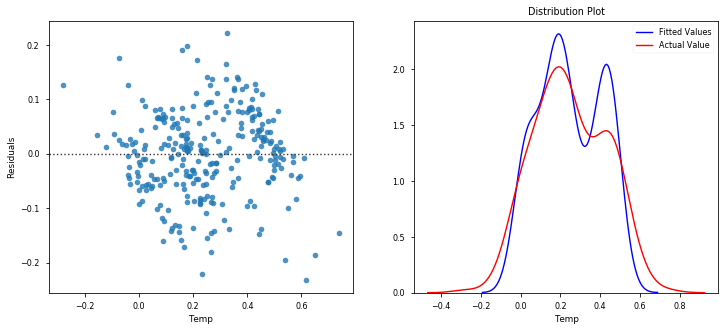

In [26]:
print("Training")
model_evaluation(lm, Xtrain, ytrain)

Test
Model performance R^2 = 0.6274054133684843
Baseline model prediction 0.24779929577464785
RSS = 0.2183474527003262
TSS = 0.5860188540964096


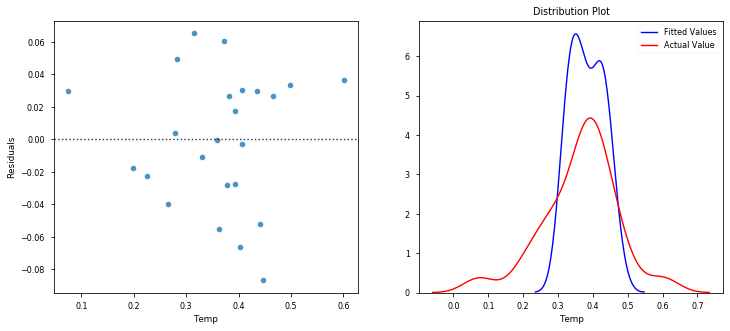

In [27]:
print("Test")
model_evaluation(lm, Xtest, ytest)

##### statsmodels

One important piece of information to consider when evaluatong the model is the significance of the independent variables. To evalueate the significance we need to use anothe Python library `statsmodels`. In a linear regression model, a coefficient is considered significant if the coefficient estimape is significantly different from zero according to the data used to build the model. If a coefficiant is not significantly different than zero, then we should probably remove the variable from the model, since it is not helping predict the dependent variable.

In [28]:
# rename variable with "-" in name to be able to set formula in regression model
Train1 = Train.copy()
#Train1 is Train
Train1.rename(columns = {"CFC-11":"CFC11", "CFC-12":"CFC12"}, inplace = True)

In [29]:
# statsmodel using formula
import statsmodels.formula.api as smf
lm1 = smf.ols('Temp ~ MEI+CO2+CH4+N2O+CFC11+CFC12+TSI+Aerosols', data=Train1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     103.6
Date:                Mon, 24 Jun 2019   Prob (F-statistic):           1.94e-78
Time:                        20:26:57   Log-Likelihood:                 280.10
No. Observations:                 284   AIC:                            -542.2
Df Residuals:                     275   BIC:                            -509.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.5943     19.887     -6.265      0.0

A probability that a coefficient is actually zero given the data called `p-value` (`p-value` < 0.05 means that a coefficient is significant and we can infer that there is an assosiation between predictor and the response). 

## Reference

1. [Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani, An Introduction to Statistical Learning with
Applications in R, 2013](http://www-bcf.usc.edu/~gareth/ISL/index.html).